In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from scipy.integrate import solve_ivp

from IPython.display import HTML
plt.style.use("../matplotlib_style/standard_plot_style.mplstyle")


We use the pendula as an example. Here we have two equations of motion:
$$\dot{r} = 0$$
$$\dot{\Theta} = \frac{g}{l}\sin\theta$$

# Funcs

In [52]:
g = 9.8
l = 4.0


In [53]:
def calculate_energies(path):
    kin = 0.5 * l**2 * path.y[2]**2
    pot = g * l * (1 - np.cos(path.y[1]))
    return kin + pot, kin, pot

def plot_energies(path):
    fig, ax = plt.subplots(figsize=(6, 6))

    kin = 0.5 * l**2 * path.y[2]**2
    pot = g * l * (1 - np.cos(path.y[1]))

    ax.plot(path.t, kin, label = "Kinetic")
    ax.plot(path.t, pot, label = "Potential")
    ax.plot(path.t, kin + pot, label = "Total")

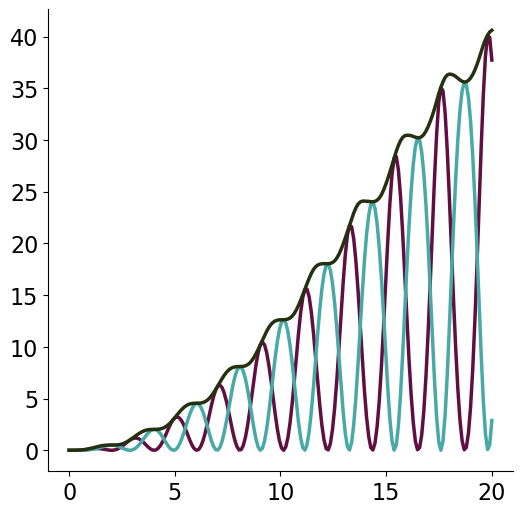

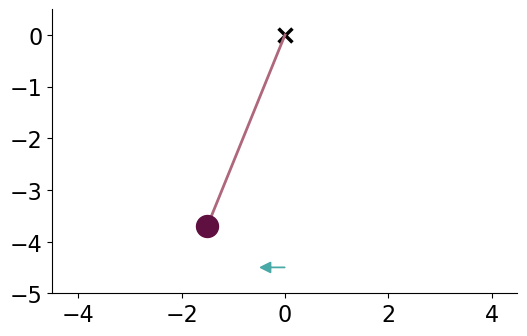

In [54]:

drive_strength = 0.25
drive_freq     = np.sqrt(g / l)

r_init = l
theta_init     = 0 # 0 is vertical
theta_dot_init = 0


def drive(t):
    return drive_strength * np.sin(drive_freq * t)


def f(t, y):
    r, theta, theta_dot = y

    r_dot           = 0
    theta_dot       = theta_dot
    theta_dot_dot   = - g / l * np.sin(theta) + drive(t)
    return [r_dot, theta_dot, theta_dot_dot]

path = solve_ivp(f, [0, 20], [r_init, theta_init, theta_dot_init], t_eval=np.linspace(0, 20, 200))

plot_energies(path)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-5.0, 0.5)
ax.set_aspect("equal")

anchor      = ax.scatter(0, 0, c = "k", marker = "x", s = 100)
line        = ax.plot([0, r_init * np.sin(theta_init)], [0,- r_init * np.cos(theta_init)], lw=2, color = "C4")[0]
pendula     = ax.scatter(r_init * np.sin(theta_init),- r_init * np.cos(theta_init), zorder = 2, s = 250)

arrow       = ax.arrow(0, -4.50, 0, 0, head_width = 0.2, head_length = 0.2, color = "C1", zorder = 2)

dx_display_factor = 10

def update(i):
    theta = path.y[1, i]
    line.set_data([0, r_init * np.sin(theta)], [0, - r_init * np.cos(theta)])
    pendula.set_offsets([r_init * np.sin(theta),-  r_init * np.cos(theta)])

    # Set arrow dx and dy to the size of the drive at time t
    dx = dx_display_factor * drive(path.t[i])
    arrow.set_data(dx = dx)


anim = animation.FuncAnimation(fig, update, frames=range(len(path.t)), interval= 30)
HTML(anim.to_html5_video())

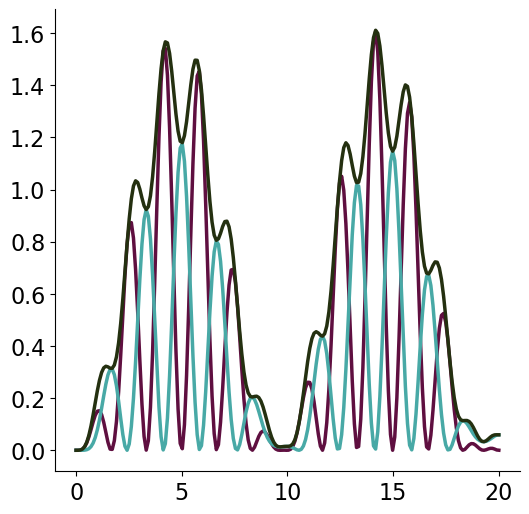

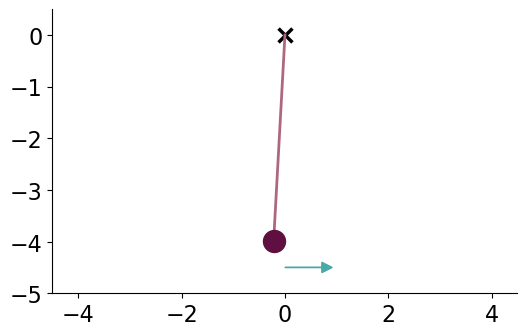

In [55]:
g = 9.8
l = 4.0

drive_strength = 0.25
drive_freq     = np.sqrt(2 * g / l)

r_init = l
theta_init     = 0 # 0 is vertical
theta_dot_init = 0


def drive(t):
    return drive_strength * np.sin(drive_freq * t)


def f(t, y):
    r, theta, theta_dot = y

    r_dot           = 0
    theta_dot       = theta_dot
    theta_dot_dot   = - g / l * np.sin(theta) + drive(t)
    return [r_dot, theta_dot, theta_dot_dot]

path = solve_ivp(f, [0, 20], [r_init, theta_init, theta_dot_init], t_eval=np.linspace(0, 20, 200))

plot_energies(path)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-5.0, 0.5)
ax.set_aspect("equal")

anchor      = ax.scatter(0, 0, c = "k", marker = "x", s = 100)
line        = ax.plot([0, r_init * np.sin(theta_init)], [0,- r_init * np.cos(theta_init)], lw=2, color = "C4")[0]
pendula     = ax.scatter(r_init * np.sin(theta_init),- r_init * np.cos(theta_init), zorder = 2, s = 250)

arrow       = ax.arrow(0, -4.50, 0, 0, head_width = 0.2, head_length = 0.2, color = "C1", zorder = 2)

dx_display_factor = 10

def update(i):
    theta = path.y[1, i]
    line.set_data([0, r_init * np.sin(theta)], [0, - r_init * np.cos(theta)])
    pendula.set_offsets([r_init * np.sin(theta),-  r_init * np.cos(theta)])

    # Set arrow dx and dy to the size of the drive at time t
    dx = dx_display_factor * drive(path.t[i])
    arrow.set_data(dx = dx)


anim = animation.FuncAnimation(fig, update, frames=range(len(path.t)), interval= 30)
HTML(anim.to_html5_video())

# energy absorption

In [62]:
g = 9.8
l = 4.0

def calculate_energies(path):
    kin = 0.5 * l**2 * path.y[2]**2
    pot = g * l * (1 - np.cos(path.y[1]))
    return kin + pot, kin, pot


def drive(t):
    return drive_strength * np.sin(drive_freq * t)


def f(t, y):
    r, theta, theta_dot = y

    r_dot           = 0
    theta_dot       = theta_dot
    theta_dot_dot   = - g / l * np.sin(theta) + drive(t)
    return [r_dot, theta_dot, theta_dot_dot]


def simulation(drive_strength, drive_freq, r_init, theta_init, theta_dot_init):
    def drive(t):
        return drive_strength * np.sin(drive_freq * t)

    def f(t, y):
        r, theta, theta_dot = y

        r_dot           = 0
        theta_dot       = theta_dot
        theta_dot_dot   = - g / l * np.sin(theta) + drive(t) / l
        return [r_dot, theta_dot, theta_dot_dot]

    path = solve_ivp(f, [0, 20], [r_init, theta_init, theta_dot_init], t_eval=np.linspace(0, 20, 200))
    return path

In [63]:
drive_strength      = 0.25
drive_freq_to_scan  = np.sqrt(g / l) * np.linspace(0.5, 2, 100)

r_init         = l
theta_init     = 0 # 0 is vertical
theta_dot_init = 0

paths = []
from tqdm import tqdm
for drive_freq in tqdm(drive_freq_to_scan):
    paths.append(simulation(drive_strength, drive_freq, r_init, theta_init, theta_dot_init))

100%|██████████| 100/100 [00:00<00:00, 200.49it/s]


In [64]:
enegies_4 = np.array([calculate_energies(p)[0] for p in paths])

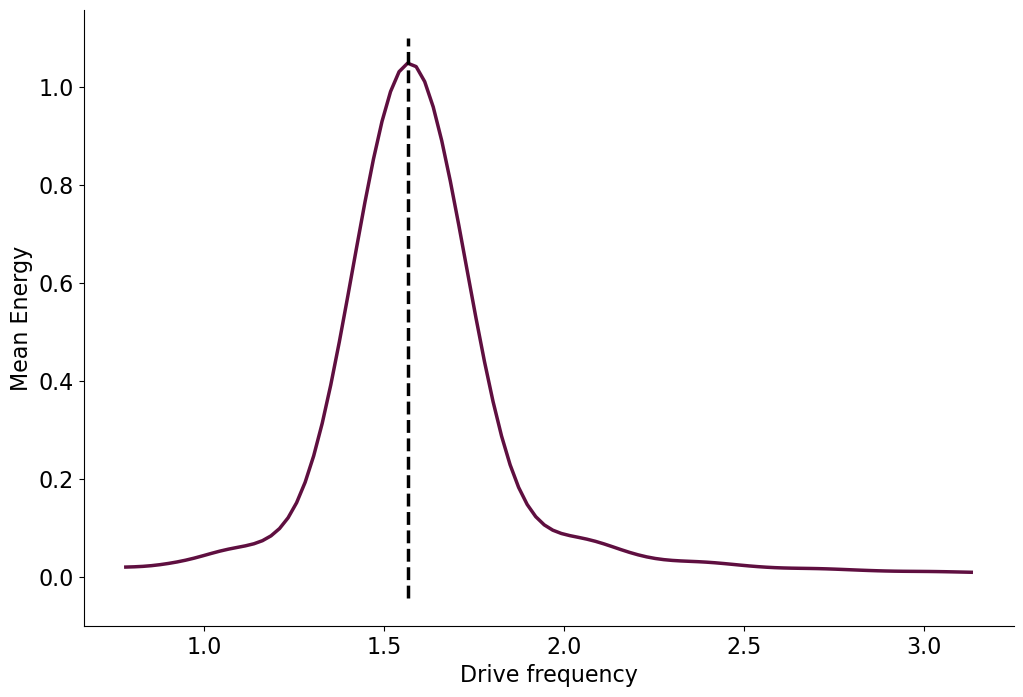

In [65]:
fig, ax = plt.subplots()

ax.plot(drive_freq_to_scan, enegies_4.mean(axis = 1))
ax.set_xlabel("Drive frequency")
ax.set_ylabel("Mean Energy")

ax.vlines(np.sqrt(g / l), *plt.gca().get_ylim(), color = "k", linestyle = "--")

100%|██████████| 100/100 [00:00<00:00, 163.27it/s]


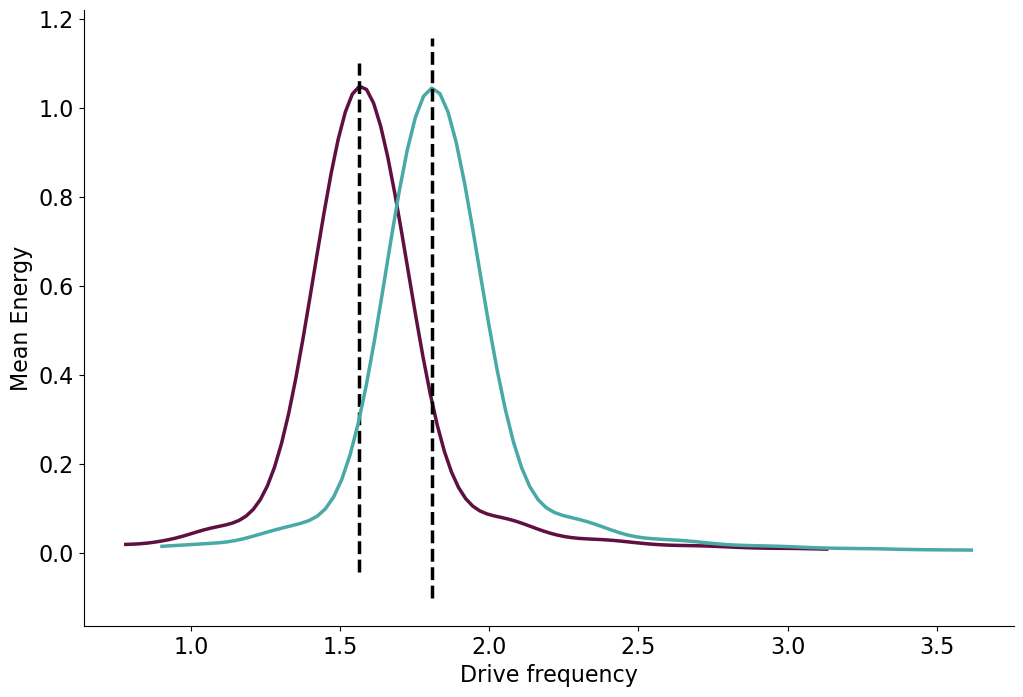

In [66]:
g = 9.8
l = 3.0

def calculate_energies(path):
    kin = 0.5 * l**2 * path.y[2]**2
    pot = g * l * (1 - np.cos(path.y[1]))
    return kin + pot, kin, pot


def drive(t):
    return drive_strength * np.sin(drive_freq * t)


def f(t, y):
    r, theta, theta_dot = y

    r_dot           = 0
    theta_dot       = theta_dot
    theta_dot_dot   = - g / l * np.sin(theta) + drive(t)
    return [r_dot, theta_dot, theta_dot_dot]


def simulation(drive_strength, drive_freq, r_init, theta_init, theta_dot_init):
    def drive(t):
        return drive_strength * np.sin(drive_freq * t)

    def f(t, y):
        r, theta, theta_dot = y

        r_dot           = 0
        theta_dot       = theta_dot
        theta_dot_dot   = - g / l * np.sin(theta) + drive(t) / l
        return [r_dot, theta_dot, theta_dot_dot]

    path = solve_ivp(f, [0, 20], [r_init, theta_init, theta_dot_init], t_eval=np.linspace(0, 20, 200))
    return path
drive_strength      = 0.25
drive_freq_to_scan  = np.sqrt(g / l) * np.linspace(0.5, 2, 100)

r_init         = l
theta_init     = 0 # 0 is vertical
theta_dot_init = 0

paths = []

from tqdm import tqdm
for drive_freq in tqdm(drive_freq_to_scan):
    paths.append(simulation(drive_strength, drive_freq, r_init, theta_init, theta_dot_init))

enegies_3 = np.array([calculate_energies(p)[0] for p in paths])
ax.plot(drive_freq_to_scan, enegies_3.mean(axis = 1))
ax.set_xlabel("Drive frequency")
ax.set_ylabel("Mean Energy")

ax.vlines(np.sqrt(g / l), *ax.get_ylim(), color = "k", linestyle = "--")

fig